In [282]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import scipy as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv

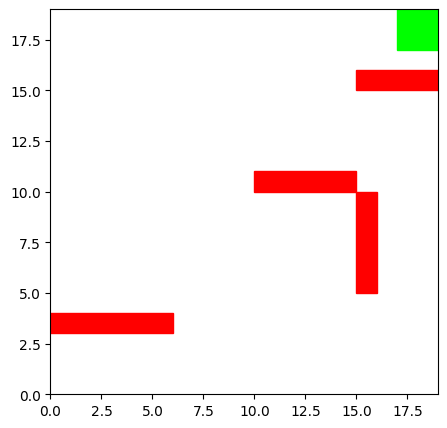

In [283]:
m = 20
fig,ax = plt.subplots()


ax.set_xlim([0,m-1])
ax.set_ylim([0,m-1])

ax.add_patch(plt.Rectangle([10,10], 5,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,15], 4,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,5], 1,5,color='#FF0000'))

ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()


In [284]:
arrived = [[17,18],[17,18]]
avoid = [[10,11,12,13,14,15,0,1,2,3,4,5,6,16,17,18,19],[10,15,3,5,6,7,8,9]]

In [285]:
def Q(s1,s,a):
    if a == "u":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == m-2:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.7
            elif s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.3
            else:
                return 0
        elif s[0] != 0 and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5 
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif s[0] == 0 and s[1] < m-2:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.4
            elif s1[0] == s[0] and s1[1] == s[1]+2:
                return 0.6
            else:
                return 0
        elif s[1] == m-2 and s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 1
            else:
                return 0
        elif s[1] == m-1 and s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.3
            elif s1[0] == s[0] and s1[1] == s[1]+2:
                return 0.4
            elif s1[0] == s[0]-1 and s1[1] == s[1]+2:
                return 0.2
            elif s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.1
            else:
                return 0
            
    if a == "d":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        if s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.6
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.4
            else:
                return 0
        elif s[0] == 0 and s[1] != 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]-1:
                return 0.5
            else: 
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else: 
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0] and s1[1] == s[1]-1:
                return 0.3
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0]-1 and s1[1] == s[1]-1:
                return 0.2
            else: 
                return 0

    if a == "l":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == 0 and s[1] != m-1:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif s[0] == 1 and s[1] != m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.5
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif (s[0] == 0) and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif (s[0] == 1) and s[1] == m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] > 1 and s[1] == m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.3
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0]-2 and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0]-2 and s1[1] == s[1]+1:
                return 0.2
            else:
                return 0

    if a == "r":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        if s[0] == m-1 and s[1] != m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.5
            else:
                return 0
        elif s[0] != m-1 and s[1] == m-1:
            if s1[0] == s[0]+1 and s1[1] == s[1]:
                return 0.7
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.3
            else:
                return 0

        elif s[0] == m-1 and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0]+1 and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0]+1 and s1[1] == s[1]+1:
                return 0.4
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.1
            else:
                return 0



In [286]:
def r(s,a):
    r = -1
    if s[0] in avoid[0] and s[1] in avoid[1]:
        r = -1000
    elif s[0] in arrived[0] and s[1] in arrived[1]:
        r = 100
    return r

In [287]:
states = [(i,j) for i in range(0,m) for j in range(0,m)]
actions = ["u","d","l","r"]

In [288]:
lmbda = 0.9
N = m

def policy_iteration(S,A,P,R,lmbda):
    policy = {s: A[0] for s in S}
    
    while True:
        old_policy = policy.copy()
        V = policy_evaluation(policy, S, P, R,lmbda)
        policy = policy_improvement(V, policy, S, A, P, R,lmbda)
        if all(old_policy[s] == policy[s] for s in S):
            break

    return policy

def policy_evaluation(policy, S, P, R,lmbda):
    V = {s:0 for s in S}

    while True:
        oldV = V.copy()

        for s in S:
            estadosAdmisibles = estadosVecinos2(s)
            a = policy[s]
            
            V[s] = R(s,a) + lmbda * sum(P(s_next,s,a)* oldV[s_next] for s_next in estadosAdmisibles)
            #print('estado evaluado')
        if all(oldV[s]==V[s] for s in S):
            break
    return V

def policy_improvement(V,policy, S, A, P, R,lmbda):
    #policy = {s: A[0] for s in S}

    for s in S:
        Q = {}
        estadosAdmisibles = estadosVecinos2(s)
        for a in A:
            #cambiar s in S por s in S_admisibles(s)
            Q[a] = R(s,a) + lmbda * sum(P(s_next,s,a)* V[s_next] for s_next in estadosAdmisibles)
            
        policy[s] = max(Q, key=Q.get)
    return policy

def estadosVecinos2(s):
    x,y = s
    S_s = []
    for i in range(max(x-2,0),min(N,x+3)):
        for j in range(max(y-2,0),min(N,y+3)):
            pos = (i,j)
            S_s.append(pos)
    return S_s

In [295]:
#mostrar plano
piMatriz = []
for i in range(N):
    lista = []
    for j in range(N):
        
        if j in arrived[0] and i in arrived[1]:
            lista.append('O')
        else:
            lista.append('-')
    piMatriz.append(lista)

# creating df object with columns specified    
df = pd.DataFrame(piMatriz) 
print(df) 
pi = policy_iteration(states,actions,Q,r,0.9)

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19
0   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
2   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
3   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
4   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
5   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
6   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
7   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
8   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
9   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
10  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
11  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
12  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
13  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
14  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

In [290]:
#para cada politica
piMatriz = []
for i in range(N):
    lista = []
    for j in range(N):
        
        lista.append(pi[(j,i)])
    piMatriz.append(lista)

# creating df object with columns specified    
df = pd.DataFrame(piMatriz) 
print(df)

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19
0   r  r  r  r  r  r  r  r  r  u  u  l  l  l  l  l  l  l  l  l
1   d  d  r  r  r  r  r  r  r  u  l  l  l  l  l  l  l  l  l  l
2   d  d  d  d  d  d  d  r  r  u  l  d  d  d  d  d  d  d  d  d
3   d  d  d  d  d  r  r  r  r  u  l  l  l  d  d  d  d  d  d  d
4   d  d  d  d  d  r  r  r  r  u  l  l  l  l  l  d  d  d  d  d
5   d  d  d  d  d  r  r  r  r  u  l  l  d  d  d  d  d  d  d  d
6   u  u  u  u  u  r  r  r  r  u  l  l  l  l  u  u  u  u  u  u
7   u  u  u  u  u  u  r  r  r  u  l  l  l  u  u  u  u  u  u  u
8   u  u  u  u  u  u  r  r  r  u  l  l  u  u  u  u  u  u  u  u
9   u  u  u  u  u  u  r  r  r  u  l  u  u  u  u  u  u  u  u  u
10  u  u  u  u  u  u  u  r  r  u  u  u  u  u  u  u  u  u  u  u
11  r  r  r  r  r  r  r  r  r  u  u  u  r  r  r  r  r  u  u  u
12  d  r  r  r  r  r  r  r  r  u  u  l  l  r  r  r  r  u  u  u
13  d  d  r  r  r  r  r  r  r  u  l  l  l  r  r  r  r  r  r  l
14  d  d  d  d  d  d  d  r  r  u  l  d  d  d  d  u  u  

In [300]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [297]:
def simulationss(pi):
    simulations = []
    for i in range(0,200):
        if i>=100:
            start = (0,0)
        else:
            start = (19,0)
        
        positions = [start]
        
        for i in range(0,100):
            decision = pi[start]
            list_of_probs = []

            for s in states:
                list_of_probs.append(Q(s,start,decision)) 
            next_start = np.random.choice([x for x in range(0,m**2)],1,p=list_of_probs)
            positions.append(states[next_start[0]])
            start=states[next_start[0]]

        simulations.append(positions)
    return simulations

simulations = simulationss(pi)


In [298]:
x = []
y = []
for positions in simulations:
    x1 = []
    y1 = []
    for tuple in positions:
        x1.append(tuple[0])
        y1.append(tuple[1])
    x.append(x1)
    y.append(y1)


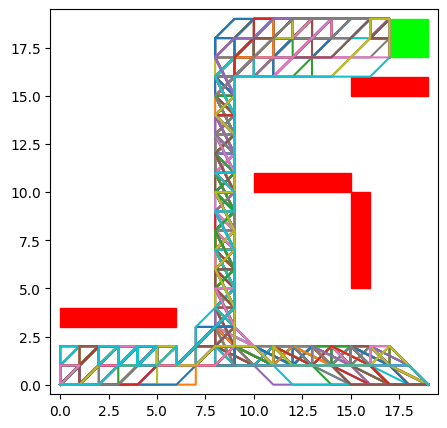

In [299]:
m = 20
fig,ax = plt.subplots()


ax.set_xlim([-0.5,m-0.5])
ax.set_ylim([-0.5,m-0.5])

'''
ax.add_patch(plt.Rectangle([10,10], 5,5,color='#FF0000'))
ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))
'''"taller2 copy.ipynb"
ax.add_patch(plt.Rectangle([10,10], 5,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,15], 4,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,5], 1,5,color='#FF0000'))

ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))

for i in range(0,len(x)):
    plt.plot(x[i],y[i])

fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

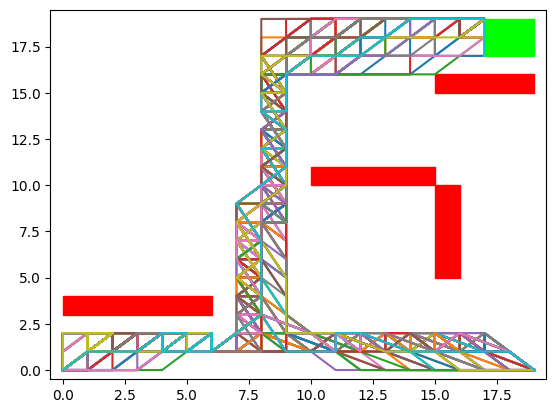

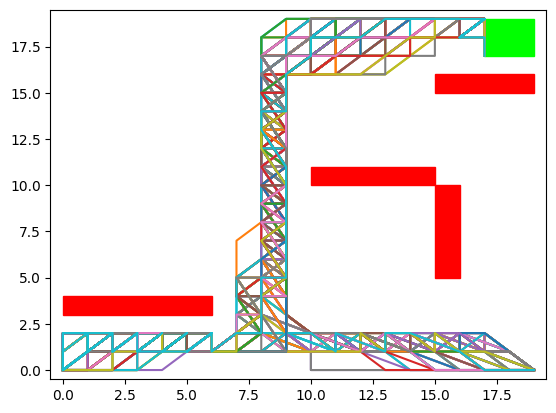

In [302]:
A = pis
for pi in A:
    simulations = simulationss(pi)
    x = []
    y = []
    for positions in simulations:
        x1 = []
        y1 = []
        for tuple in positions:
            x1.append(tuple[0])
            y1.append(tuple[1])
        x.append(x1)
        y.append(y1)
    m = 20
    fig,ax = plt.subplots()


    ax.set_xlim([-0.5,m-0.5])
    ax.set_ylim([-0.5,m-0.5])

    '''
    ax.add_patch(plt.Rectangle([10,10], 5,5,color='#FF0000'))
    ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
    ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))
    '''"taller2 copy.ipynb"
    ax.add_patch(plt.Rectangle([10,10], 5,1,color='#FF0000'))
    ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
    ax.add_patch(plt.Rectangle([15,15], 4,1,color='#FF0000'))
    ax.add_patch(plt.Rectangle([15,5], 1,5,color='#FF0000'))

    ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))

    for i in range(0,len(x)):
        plt.plot(x[i],y[i])


    plt.show()
